**Objective**
To build a machine learning regression to predict youtube adview count based on other youtube metrics.

**Steps and Tasks**
1. Import the datasets and libraries, check shape and datatype.
2. Visualise the dataset using plotting using heatmaps and plots. You
can study data distributions for each attribute as well.
3. Clean the dataset by removing missing values and other things.
4. Transform attributes into numerical values and other
necessary transformations
5. Normalise your data and split the data into training, validation and test
set in the appropriate ratio.
6. Use linear regression, Support Vector Regressor for training and get
errors.
7. Use Decision Tree Regressor and Random Forest Regressors.
8. Build an artificial neural network and train it with different layers
and hyperparameters. Experiment a little. Use keras.
9. Pick the best model based on error as well as
generalisation.
10. Save your model and predict on the test set.

In [45]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Importing dataset
trainData=pd.read_csv('train.csv')
trainData.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,F
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,D
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,C
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,H
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,D


In [46]:
trainData.shape

(14999, 9)

In [47]:
# Assigning each category a number for Category feaure
category={'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7,'H':8}
trainData["category"]=trainData["category"].map(category)
trainData.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,VID_18655,40,1031602,8523,363,1095,2016-09-14,PT7M37S,6
1,VID_14135,2,1707,56,2,6,2016-10-01,PT9M30S,4
2,VID_2187,1,2023,25,0,2,2016-07-02,PT2M16S,3
3,VID_23096,6,620860,777,161,153,2016-07-27,PT4M22S,8
4,VID_10175,1,666,1,0,0,2016-06-29,PT31S,4


In [48]:
# Removing "F" present in data
trainData=trainData[trainData.views!='F']
trainData=trainData[trainData.likes!='F']
trainData=trainData[trainData.dislikes!='F']
trainData=trainData[trainData.comment!='F']

In [49]:
trainData.dtypes

vidid        object
adview        int64
views        object
likes        object
dislikes     object
comment      object
published    object
duration     object
category      int64
dtype: object

In [50]:
# Convert values to integer
trainData["views"]= pd.to_numeric(trainData["views"])
trainData["likes"]= pd.to_numeric(trainData["likes"])
trainData["dislikes"]= pd.to_numeric(trainData["dislikes"])
trainData["comment"]= pd.to_numeric(trainData["comment"])
trainData["adview"]= pd.to_numeric(trainData["adview"])

column_vidid=trainData["vidid"]

In [51]:
trainData.dtypes

vidid        object
adview        int64
views         int64
likes         int64
dislikes      int64
comment       int64
published    object
duration     object
category      int64
dtype: object

In [52]:
# Encoding features like Category, Duration, Vidid
from sklearn.preprocessing import LabelEncoder
trainData['duration']=LabelEncoder().fit_transform(trainData['duration'])
trainData['vidid']=LabelEncoder().fit_transform(trainData['vidid'])
trainData['published']=LabelEncoder().fit_transform(trainData['published'])

trainData.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,2925,6
1,2741,2,1707,56,2,6,2185,3040,4
2,8138,1,2023,25,0,2,2094,1863,3
3,9005,6,620860,777,161,153,2119,2546,8
4,122,1,666,1,0,0,2091,1963,4


In [53]:
# Convert Time in sec for duration
import datetime
import time

def checki(x):
  y=x[2:]
  h='00'
  m='00'
  s='00'
  mm=''
  P = ['H','M','S']
  for i in y:
    if i not in P:
      mm+=i
    else:
      if i=="H":
        h=mm
      elif i=="M":
        m=mm
      else:
        s=mm
      mm=''

  bp = h+':'+m+':'+s
  return bp

train=pd.read_csv("train.csv")
mp=train["duration"]
time = mp.apply(checki)
time.head(20)

0      00:7:37
1      00:9:30
2      00:2:16
3      00:4:22
4     00:00:31
5     00:00:15
6      00:3:20
7     00:00:58
8     00:27:50
9     00:11:19
10    00:12:25
11     00:3:48
12     00:4:14
13     2:23:28
14     00:2:50
15    00:00:37
16    00:00:26
17     00:5:12
18    00:00:22
19     00:3:16
Name: duration, dtype: object

In [54]:
def func_sec(time_string):
  h, m, s=time_string.split(':')
  return int(h)*3600 +int(m)*60 +int(s)

time1=time.apply(func_sec)

trainData["duration"]=time1
trainData.head()

,vidid,adview,views,likes,dislikes,comment,published,duration,category
0,5912,40,1031602,8523,363,1095,2168,457,6
1,2741,2,1707,56,2,6,2185,570,4
2,8138,1,2023,25,0,2,2094,136,3
3,9005,6,620860,777,161,153,2119,262,8
4,122,1,666,1,0,0,2091,31,4


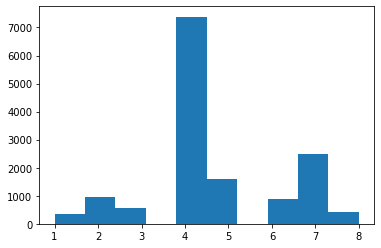

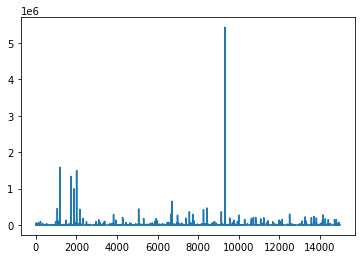

In [55]:
# Visualization
  # Individual Plots
plt.hist(trainData["category"])
plt.show()
plt.plot(trainData["adview"])
plt.show()

In [56]:
# Remove videos with adview greater than 2000000 as outlier
trainData=trainData[trainData["adview"]<2000000]

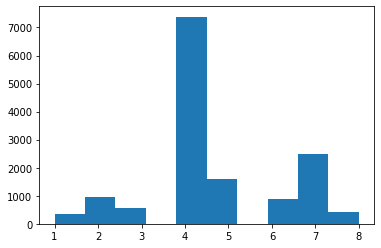

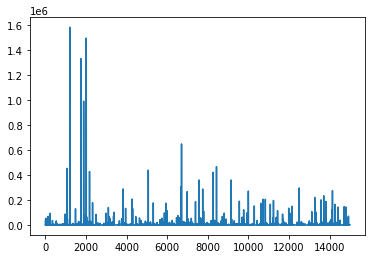

In [57]:
# Visualization
  # Individual Plots
plt.hist(trainData["category"])
plt.show()
plt.plot(trainData["adview"])
plt.show()

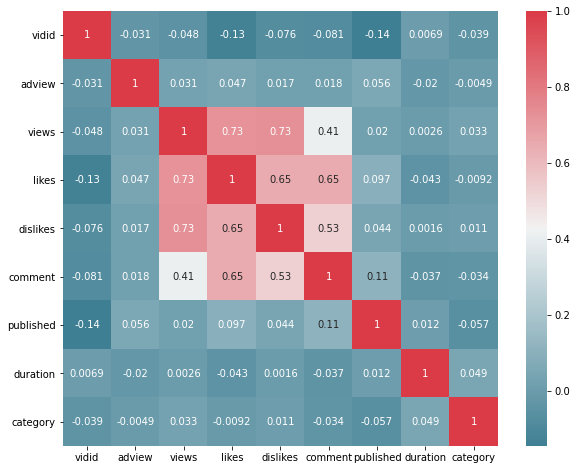

In [58]:
# Heatmap
import seaborn as sns

f, ax = plt.subplots(figsize=(10,8))
corr= trainData.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)
plt.show()

In [59]:
# Split data
Y_train = pd.DataFrame(data = trainData.iloc[:,1].values,columns=['target']) #adview column
trainData=trainData.drop(["adview"],axis=1)
trainData=trainData.drop(["vidid"],axis=1)
trainData.head(),Y_train

(     views  likes  dislikes  comment  published  duration  category
 0  1031602   8523       363     1095       2168       457         6
 1     1707     56         2        6       2185       570         4
 2     2023     25         0        2       2094       136         3
 3   620860    777       161      153       2119       262         8
 4      666      1         0        0       2091        31         4,
        target
 0          40
 1           2
 2           1
 3           6
 4           1
 ...       ...
 14631       2
 14632       1
 14633       4
 14634       1
 14635       1
 
 [14636 rows x 1 columns])

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trainData, Y_train, test_size=0.2, random_state=42)
X_train, y_train, X_test, y_test

(         views  likes  dislikes  comment  published  duration  category
 13440    86739    117         9        4       1217       180         4
 9523   1419766    887       362      232       1547      5811         7
 3012     26086     19         0        9        966       178         6
 1888    305445   3662        45      555       1484       257         7
 11378   737649   1702        96       53       1127       895         4
 ...        ...    ...       ...      ...        ...       ...       ...
 5316     31648    140        24       14       1925       231         7
 13748     1804      4         1        0       1049       232         4
 5522    204817     86        35       11       1237       218         4
 883    1361366   1384       757      185       2145       240         7
 7445     39758    122         6        3        224       354         4
 
 [11708 rows x 7 columns],        target
 13119      39
 9293        4
 2937    18782
 1839        2
 11099      20
 ...  

In [61]:
X_train.shape

(11708, 7)

In [64]:
# Normalize Data +convert panda array to numpy array automatically,values b/w 0 &1 taking min,max values
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_train,X_test
# X_train.describe()-count,mean,std,min,max

(array([[6.27970800e-04, 4.12227296e-04, 1.82005703e-04, ...,
         5.10700797e-01, 4.25360966e-03, 4.28571429e-01],
        [1.02842406e-02, 3.12517617e-03, 7.32067383e-03, ...,
         6.49181704e-01, 1.37320699e-01, 8.57142857e-01],
        [1.88608556e-04, 6.69428942e-05, 0.00000000e+00, ...,
         4.05371381e-01, 4.20634733e-03, 7.14285714e-01],
        ...,
        [1.48331209e-03, 3.03004679e-04, 7.07799956e-04, ...,
         5.19093580e-01, 5.15159392e-03, 4.28571429e-01],
        [9.86119882e-03, 4.87626135e-03, 1.53087019e-02, ...,
         9.00125892e-01, 5.67147955e-03, 8.57142857e-01],
        [2.87646701e-04, 4.29843847e-04, 1.21337135e-04, ...,
         9.39991607e-02, 8.36543233e-03, 4.28571429e-01]]),
 array([[7.17372469e-03, 8.63080853e-03, 3.31069610e-03, ...,
         1.54621849e-01, 1.32738468e-02, 4.28571429e-01],
        [3.43438476e-06, 1.06225336e-05, 0.00000000e+00, ...,
         8.59243697e-01, 3.68717968e-04, 5.71428571e-01],
        [4.17243632e-04, 

In [65]:
X_train.mean()

0.1739096800320488

In [66]:
# Evaluation Data
from sklearn import metrics
def print_error(X_test, y_test, model_name):
  prediction = model_name.predict(X_test)
  print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction))
  print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction))
  print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


In [67]:
# Linear Regression
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
linear_regression.fit(X_train, y_train)
print_error(X_test,y_test, linear_regression)

#linear_regression.predict(X_test)

Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [68]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train, y_train)
print_error(X_test, y_test, decision_tree)

Mean Absolute Error: 2835.9627732240438
Mean Squared Error: 1200085548.8384564
Root Mean Squared Error: 34642.25092049384


In [69]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
n_estimators = 200
max_depth = 25
min_samples_split = 15
min_samples_leaf = 2
random_forest= RandomForestRegressor(n_estimators =n_estimators,max_depth=max_depth,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf)
random_forest.fit(X_train,y_train)
print_error(X_test,y_test,random_forest)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Mean Absolute Error: 3361.4018026234116
Mean Squared Error: 688194090.4734002
Root Mean Squared Error: 26233.453651271313


In [70]:
# Support Vector Regressor
from sklearn.svm import SVR
supportvector_regressor = SVR()
supportvector_regressor.fit(X_train,y_train)
print_error(X_test,y_test, linear_regression)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Absolute Error: 3707.378005824532
Mean Squared Error: 835663131.1210337
Root Mean Squared Error: 28907.83857573986


In [71]:
# Artificial Neural Network
import keras
from keras.layers import Dense

ann = keras.models.Sequential([
                               Dense(6, activation="relu",
                                     input_shape=X_train.shape[1:]),
                               Dense(6, activation="relu"),
                               Dense(1)
])#dense(1) is the output layer with 1 neuron
optimizer=keras.optimizers.Adam()
loss=keras.losses.mean_squared_error
ann.compile(optimizer=optimizer,loss=loss,metrics=["mean_squared_error"])

history=ann.fit(X_train,y_train,epochs=100)

ann.summary()

print_error(X_test,y_test,ann)

Epoch 1/100
366/366 [==============================] - 1s 1ms/step - loss: 342305607.2031 - mean_squared_error: 342305607.2031
Epoch 2/100
366/366 [==============================] - 0s 1ms/step - loss: 930021075.0330 - mean_squared_error: 930021075.0330
Epoch 3/100
366/366 [==============================] - 0s 1ms/step - loss: 617054903.3706 - mean_squared_error: 617054903.3706
Epoch 4/100
366/366 [==============================] - 0s 1ms/step - loss: 1055085731.0518 - mean_squared_error: 1055085731.0518
Epoch 5/100
366/366 [==============================] - 0s 1ms/step - loss: 553637521.1022 - mean_squared_error: 553637521.1022
Epoch 6/100
366/366 [==============================] - 0s 1ms/step - loss: 283947655.5347 - mean_squared_error: 283947655.5347
Epoch 7/100
366/366 [==============================] - 0s 1ms/step - loss: 442529095.7146 - mean_squared_error: 442529095.7146
Epoch 8/100
366/366 [==============================] - 0s 1ms/step - loss: 647127294.5395 - mean_squared_erro

In [25]:
# Saving Scikitlearn models
import joblib
joblib.dump(decision_tree,"decisiontree_youtubeadview.pkl")

['decisiontree_youtubeadview.pkl']

In [27]:
# Saving keras Artificial Neural Network model
ann.save("ann_youtubeadview.h5")

# **Test.csv Preprocessing**

In [72]:
test_data=pd.read_csv('test.csv')
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,B
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,F
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,D
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,G
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,B


In [73]:
test_data.shape

(8764, 8)

In [74]:
test_data["category"]=test_data["category"].map(category)
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,VID_1054,440238,6153,218,1377,2017-02-18,PT7M29S,2
1,VID_18629,1040132,8171,340,1047,2016-06-28,PT6M29S,6
2,VID_13967,28534,31,11,1,2014-03-10,PT37M54S,4
3,VID_19442,1316715,2284,250,274,2010-06-05,PT9M55S,7
4,VID_770,1893173,2519,225,116,2016-09-03,PT3M8S,2


In [77]:
test_data=test_data[test_data.views!='F']
test_data=test_data[test_data.likes!='F']
test_data=test_data[test_data.dislikes!='F']
test_data=test_data[test_data.comment!='F']
test_data.shape

(8549, 8)

In [80]:
test_data["views"]=pd.to_numeric(test_data["views"])
test_data["likes"]=pd.to_numeric(test_data["likes"])
test_data["dislikes"]=pd.to_numeric(test_data["dislikes"])
test_data["comment"]=pd.to_numeric(test_data["comment"])
column_vidid=test_data["vidid"]
column_vidid,test_data.dtypes

(0        VID_1054
 1       VID_18629
 2       VID_13967
 3       VID_19442
 4         VID_770
           ...    
 8759     VID_2944
 8760     VID_8195
 8761    VID_18973
 8762     VID_5849
 8763     VID_8494
 Name: vidid, Length: 8549, dtype: object, vidid        object
 views         int64
 likes         int64
 dislikes      int64
 comment       int64
 published    object
 duration     object
 category      int64
 dtype: object)

In [82]:
test_data['vidid']=LabelEncoder().fit_transform(test_data['vidid'])
test_data['published']=LabelEncoder().fit_transform(test_data['published'])
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,PT7M29S,2
1,3444,1040132,8171,340,1047,1825,PT6M29S,6
2,1593,28534,31,11,1,1009,PT37M54S,4
3,3775,1316715,2284,250,274,116,PT9M55S,7
4,7644,1893173,2519,225,116,1892,PT3M8S,2


In [83]:
dur=test_data["duration"]
time=dur.apply(checki)
time.head(10)

0     00:7:29
1     00:6:29
2    00:37:54
3     00:9:55
4      00:3:8
5    00:39:18
6     00:10:4
7     00:2:35
8    00:13:57
9    00:17:49
Name: duration, dtype: object

In [84]:
time_in_secs=time.apply(func_sec)
test_data["duration"]=time_in_secs
test_data.head()

,vidid,views,likes,dislikes,comment,published,duration,category
0,231,440238,6153,218,1377,2053,449,2
1,3444,1040132,8171,340,1047,1825,389,6
2,1593,28534,31,11,1,1009,2274,4
3,3775,1316715,2284,250,274,116,595,7
4,7644,1893173,2519,225,116,1892,188,2


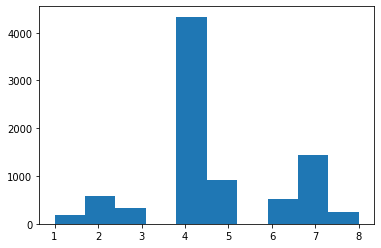

In [85]:
plt.hist(test_data["category"])
plt.show()

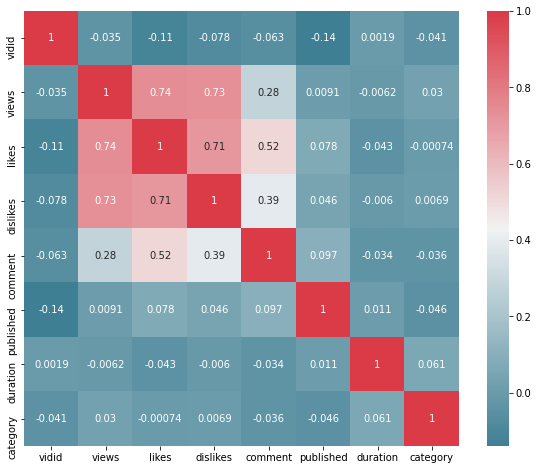

In [88]:
#Heatmap
f, ax=plt.subplots(figsize=(10,8))
corr=test_data.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax,annot=True)
plt.show()

In [89]:
test_data=test_data.drop(["vidid"],axis=1)
test_data.head()

,views,likes,dislikes,comment,published,duration,category
0,440238,6153,218,1377,2053,449,2
1,1040132,8171,340,1047,1825,389,6
2,28534,31,11,1,1009,2274,4
3,1316715,2284,250,274,116,595,7
4,1893173,2519,225,116,1892,188,2


In [91]:
X_test=scaler.fit_transform(test_data)
X_test

array([[1.95520958e-03, 1.92237996e-02, 6.05168920e-03, ...,
        9.75296912e-01, 1.07451417e-02, 1.42857143e-01],
       [4.61965571e-03, 2.55286311e-02, 9.43841435e-03, ...,
        8.66983373e-01, 9.29309552e-03, 7.14285714e-01],
       [1.26614645e-04, 9.68532080e-05, 3.05360464e-04, ...,
        4.79334917e-01, 5.49115462e-02, 4.28571429e-01],
       ...,
       [8.40188347e-03, 1.43905121e-02, 3.07858868e-02, ...,
        8.66033254e-01, 1.03821302e-02, 7.14285714e-01],
       [3.17494650e-03, 5.12072284e-03, 4.19176637e-03, ...,
        8.20902613e-01, 4.59814622e-03, 4.28571429e-01],
       [2.34068537e-05, 3.74915644e-05, 2.77600422e-05, ...,
        9.48218527e-01, 1.47382687e-02, 4.28571429e-01]])

In [93]:
prediction=decision_tree.predict(X_test)
prediction

array([ 2., 14.,  1., ..., 12.,  2.,  8.])

In [95]:
dict={'adview':prediction}
dataframe=pd.DataFrame(dict)
dataframe.head()

,adview
0,2.0
1,14.0
2,1.0
3,9.0
4,67985.0


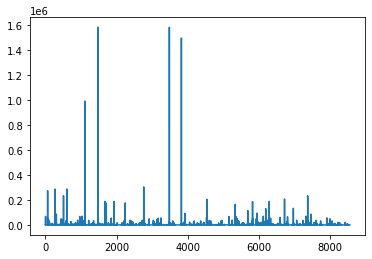

In [98]:
plt.plot(dataframe["adview"])
plt.show()

In [97]:
dataframe.to_csv('predictions.csv')